# Exploratory Data Analysis(EDA)

#### EDA is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In simple words The process of getting to know the data in depth is called Exploratory Data Analysis.
### Steps:-
##### 1. Data Collection.  It is an essential part of exploratory data analysis.
##### 2. Data Cleaning.  It refers to the process of removing unwanted variables, values from dataset and getting rid of any irregularities in it.
##### 3. Univariate Analysis.  Statistical analysis of single variable and summarize the outcome only one variable at a time.
##### 4. Bivariate Analysis.  Statistical analysis with two variables and comparing whether a relationship exists between them.

### 
### 1. Data Collection

In [1]:
#Library files Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset Load
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 
### 2. Data Cleaning

#### Find Missing or Null and NaN Values

In [4]:
dataset.shape     # it reveals no.of rows(215) and columns(15)

(215, 15)

In [5]:
dataset.isnull().head(2)               #find null values and show entire dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
dataset.isnull().sum()             #Get the sum of null values in each column of dataset    

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
dataset.isna().sum()      #Likewise, Get the sum of NaN values in each column of dataset

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
dataset.isna().sum().max()            #maximum of NaN values count

67

#### Percentage of Missing or Null and NaN values

In [9]:
dataset=pd.read_csv("Placement.csv")

In [10]:
#Finding missing data in percentage
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head()

,total,percent
salary,67,0.311628
sl_no,0,0.000000
gender,0,0.000000
ssc_p,0,0.000000
ssc_b,0,0.000000


###### To drop Missing or Null and NaN values

In [11]:
#dataset=dataset.drop((missing_data[missing_data['total']>1]).index,axis=1)   #It will drop entire "salary" column by giving axis=1.both works(axis=1 or 1)
#dataset=dataset.drop(dataset.loc[dataset['salary'].isnull()].index)          #drop all the rows of null/NaN values by the given column of dataset
#dataset=dataset.dropna()                                                     #drop all the rows of null/NaN values in any columns of whole dataset
#dataset.isna().sum().max()                                                   #Cross checking no missing values are missing..

###### To drop unwanted columns

In [12]:
dataset=dataset.drop("sl_no",axis=1)                 # It will drop "Sl_No" column entirely by giving axis=1, 
                                                       #if axis=0 Row wise delete if the given value exists in the rows.

###### To fill Missing or Null and NaN values

In [13]:
dataset["salary"]=dataset["salary"].fillna(0)           # fill null/NaN by 0 or any values to a specified column
#dataset=dataset.fillna(0)                                # fill null/NaN by 0 or any values in any column of whole dataset

In [14]:
dataset.isna().sum().max()  #Cross Checking after fill null values

0

### 
### 3. Univariate Analysis

In [15]:
dataset.describe()     # Statistical values for all the quantitative columns in the whole Dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [16]:
dataset.info()        # Get Basic informations about all column indexes in the whole Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [17]:
dataset['ssc_p'].dtypes     # Get datatype of selected column index from the Dataset

dtype('float64')

In [18]:
dataset.columns              # Get column index names of the Dataset

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [19]:
# Code to separate Quantitative & Qualitative Columns
Quan=[]
Qual=[]
for column in dataset.columns:
    if(dataset[column].dtypes=='object'):
        Qual.append(column)
    else:
        Quan.append(column)

In [20]:
Quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [21]:
Qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [22]:
# Converting as User defined function to find Quantitative & Qualitative Columns
def QuanQual(dataset):
    Quan=[]
    Qual=[]
    for column in dataset.columns:
        
        if(dataset[column].dtypes=='object'):
            Qual.append(column)
        else:
            Quan.append(column)
            
    return Quan, Qual        

In [23]:
quan,qual = QuanQual(dataset)          # Calling user defined function 'QuanQual' & Assigning it to Object name 'ans'   

In [24]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [25]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [26]:
dataset['ssc_p'].value_counts()         # Get no.of unique values and its counts separately from a column
                                        # Here the Total Unique Value counts is = 103.

62.00    11
63.00    10
67.00     9
52.00     9
73.00     9
         ..
69.70     1
80.92     1
83.00     1
86.50     1
80.60     1
Name: ssc_p, Length: 103, dtype: int64

In [27]:
dataset['ssc_p'].value_counts().index      # Show all the unique values alone as like column index from a column

Float64Index([ 62.0,  63.0,  67.0,  52.0,  73.0,  74.0,  65.0,  69.0,  77.0,
               58.0,
              ...
               81.7,  64.6,  52.6, 84.86,  75.0,  69.7, 80.92,  83.0,  86.5,
               80.6],
             dtype='float64', length=103)

In [28]:
dataset['ssc_p'].value_counts().values      # Get all the unique value counts alone as like an Array from a column 
                                               #(it's nothing but Frequency)

array([11, 10,  9,  9,  9,  7,  7,  7,  6,  6,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int64)

In [29]:
len(dataset['ssc_p'].value_counts().values)          # The length of unique values , i.e 103 here

103

In [30]:
len(dataset["ssc_p"])                        # Total length of a column values,  i.e  215 here

215

In [31]:
dataset['ssc_p'].value_counts().values/len(dataset["ssc_p"])*100       #Percentage of each unique value counts in an Array
                                                                           #(it's nothing but Relative Frequency)

array([5.11627907, 4.65116279, 4.18604651, 4.18604651, 4.18604651,
       3.25581395, 3.25581395, 3.25581395, 2.79069767, 2.79069767,
       1.86046512, 1.86046512, 1.86046512, 1.86046512, 1.39534884,
       1.39534884, 1.39534884, 1.39534884, 1.39534884, 1.39534884,
       1.39534884, 1.39534884, 1.39534884, 1.39534884, 0.93023256,
       0.93023256, 0.93023256, 0.93023256, 0.93023256, 0.93023256,
       0.93023256, 0.93023256, 0.93023256, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511628,
       0.46511628, 0.46511628, 0.46511628, 0.46511628, 0.46511

In [32]:
dataset['ssc_p'].cumsum()               # Cumulative sum of all the values a single column

0         67.00
1        146.33
2        211.33
3        267.33
4        353.13
         ...   
210    14209.23
211    14267.23
212    14334.23
213    14408.23
214    14470.23
Name: ssc_p, Length: 215, dtype: float64

#### Creating a User defined Table to tabulate the Frequencies of Unique Values

In [33]:
 frq=pd.DataFrame()           # Creating a Table named 'freq' using Pandas

In [34]:
frq                  # 'freq' Table has no values

""


In [35]:
frq["Unique_Values"]=dataset['ssc_p'].value_counts().index      # Creating a column index in 'freq' Table & Assigning each unique values

In [36]:
frq.head()            # Now the 'freq' Table has a column index and values

,Unique_Values
0,62.0
1,63.0
2,67.0
3,52.0
4,73.0


In [37]:
frq["Frequency"]=dataset['ssc_p'].value_counts().values          # Adding second column to the 'freq' Table & Assigning the Frequency of Unique values

In [38]:
frq.head()

,Unique_Values,Frequency
0,62.0,11
1,63.0,10
2,67.0,9
3,52.0,9
4,73.0,9


In [39]:
frq["Relative_Freq"]=dataset['ssc_p'].value_counts().values/len(dataset["ssc_p"])*100      # Adding third column to the 'freq' Table & Assigning the Relative Frequency of Frequency  

In [40]:
frq.head()

,Unique_Values,Frequency,Relative_Freq
0,62.0,11,5.116279
1,63.0,10,4.651163
2,67.0,9,4.186047
3,52.0,9,4.186047
4,73.0,9,4.186047


In [41]:
frq["Cumulative_Freq"]=frq["Relative_Freq"].cumsum()            # Adding fourth column to the 'freq' Table & Assigning the Cumulative Frequency of Relative Frequency

In [42]:
frq.head()

,Unique_Values,Frequency,Relative_Freq,Cumulative_Freq
0,62.0,11,5.116279,5.116279
1,63.0,10,4.651163,9.767442
2,67.0,9,4.186047,13.953488
3,52.0,9,4.186047,18.139535
4,73.0,9,4.186047,22.325581


In [43]:
# All the above 'freq' Table creation steps are defined as a function 
def FreqTable(columnName,dataset):
    frq=pd.DataFrame()
    frq["Unique_Values"]=dataset[columnName].value_counts().index
    frq["Frequency"]=dataset[columnName].value_counts().values
    frq["Relative_Freq"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100
    frq["Cumulative_Freq"]=frq["Relative_Freq"].cumsum()
    return frq

In [44]:
FreqTable('ssc_p',dataset).head()            # 'FreqTable' Function called to get Frequency Table for the column name 'ssc_p'

,Unique_Values,Frequency,Relative_Freq,Cumulative_Freq
0,62.0,11,5.116279,5.116279
1,63.0,10,4.651163,9.767442
2,67.0,9,4.186047,13.953488
3,52.0,9,4.186047,18.139535
4,73.0,9,4.186047,22.325581


In [45]:
FreqTable('mba_p',dataset).head()                 # 'FreqTable' Function called to get Frequency Table for the column name 'mba_p'

,Unique_Values,Frequency,Relative_Freq,Cumulative_Freq
0,56.70,3,1.395349,1.395349
1,66.94,2,0.930233,2.325581
2,59.47,2,0.930233,3.255814
3,60.44,2,0.930233,4.186047
4,68.07,2,0.930233,5.116279


#### Get the Statistical informations for desired individual columns in the dataset

In [46]:
dataset['ssc_p'].mean()            #Get the Mean of entire column

67.30339534883721

In [47]:
dataset['ssc_p'].median()   #Get the Median of entire column & There is no outliers because median = mean

67.0

In [48]:
dataset['ssc_p'].mode()[0]          #Get the Mode of entire column

62.0

In [49]:
univariate=pd.DataFrame(index=["Mean","Median","Mode"],columns=Quan)            #Creating a user defined Statistic Table 

In [50]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,NaN,NaN,NaN,NaN,NaN,NaN
Median,NaN,NaN,NaN,NaN,NaN,NaN
Mode,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
univariate["ssc_p"]["Mean"]

nan

In [52]:
for column in Quan:
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]

In [53]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0


In [54]:
np.percentile(dataset['ssc_p'],0)

40.89

In [55]:
np.percentile(dataset['ssc_p'],100)

89.4

In [56]:
dataset['ssc_p'].min()

40.89

In [57]:
dataset['ssc_p'].max()

89.4

In [58]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%","Max"],columns=Quan)
for column in Quan:
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=dataset[column].max()

In [59]:
dataset['salary'].mode()[0]

0.0

In [60]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Min,40.89,37.0,50.0,50.0,51.21,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Max,89.4,97.7,91.0,98.0,77.89,940000.0


In [61]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%","Max","IQR","1.5*IQR","Lesser","Greater",],columns=Quan)
for column in Quan:
    
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    
    
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=dataset[column].max()
    
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5*IQR"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5*IQR"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5*IQR"]
    

In [62]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Min,40.89,37.0,50.0,50.0,51.21,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Max,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5*IQR,22.65,18.15,16.5,35.25,12.465,423750.0


In [63]:
Lesserr=[]
Greaterr=[]
for column in Quan:

    if(univariate[column]["Min"]<univariate[column]["Lesser"]):
        Lesserr.append(column)
    if(univariate[column]["Max"]>univariate[column]["Greater"]):
        Greaterr.append(column)

print("Lesserr Columns: ",Lesserr)
print("Greaterr Columns: ",Greaterr)

Lesserr Columns:  ['hsc_p']
Greaterr Columns:  ['hsc_p', 'degree_p', 'salary']


In [64]:
univariate['hsc_p']['Lesser']

42.75

In [65]:
dataset['hsc_p']

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_p, Length: 215, dtype: float64

In [66]:
dataset['hsc_p']<=42.75

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Name: hsc_p, Length: 215, dtype: bool

In [67]:
dataset['hsc_p']<=42.75
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [68]:
dataset[dataset['hsc_p']<=42.75]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
42,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
169,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


In [69]:
dataset['hsc_p']<univariate['hsc_p']['Lesser']

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Name: hsc_p, Length: 215, dtype: bool

In [70]:
dataset['hsc_p'][dataset['hsc_p']<univariate['hsc_p']['Lesser']]

42     39.00
49     37.00
120    40.00
169    42.16
206    42.00
Name: hsc_p, dtype: float64

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
dataset['hsc_p'][dataset['hsc_p']<univariate['hsc_p']['Lesser']]=univariate['hsc_p']['Lesser']

In [73]:
dataset['hsc_p'][dataset['hsc_p']<univariate['hsc_p']['Lesser']]

Series([], Name: hsc_p, dtype: float64)

In [74]:
for less in Lesserr:
    dataset[less][dataset[less]<univariate[less]['Lesser']]=univariate[less]['Lesser']
for less in Greaterr:
    dataset[less][dataset[less]>univariate[less]['Greater']]=univariate[less]['Greater']
    

In [75]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%","Max","IQR","1.5*IQR","Lesser","Greater",],columns=Quan)
for column in Quan:
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=dataset[column].max()
    
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5*IQR"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5*IQR"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5*IQR"]
    

In [76]:
Lesserr=[]
Greaterr=[]
for column in Quan:

    if(univariate[column]["Min"]<univariate[column]["Lesser"]):
        Lesserr.append(column)
    if(univariate[column]["Max"]>univariate[column]["Greater"]):
        Greaterr.append(column)

print("Lesserr Columns: ",Lesserr)
print("Greaterr Columns: ",Greaterr)

Lesserr Columns:  []
Greaterr Columns:  []


In [77]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.334744,66.358558,72.100558,62.278186,197615.116279
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Min,40.89,42.75,50.0,50.0,51.21,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Max,89.4,91.15,88.5,98.0,77.89,706250.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5*IQR,22.65,18.15,16.5,35.25,12.465,423750.0


In [78]:
#dir(dataset['hsc_p'])

In [79]:
dataset['hsc_p'].var()

112.0637306585525

In [80]:
dataset['hsc_p'].std()

10.586015806645694

In [81]:
dataset['hsc_p'].kurtosis()

0.08690077018906717

In [82]:
dataset['hsc_p'].skew()

0.16261050623024148

In [83]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%","Max","IQR","1.5*IQR","Lesser","Greater","Variance","Std","Kurtosis","Skew"],columns=Quan)

for column in Quan:
    
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=dataset[column].max()
    
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5*IQR"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5*IQR"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5*IQR"]
    
    univariate[column]["Variance"]=dataset[column].var()
    univariate[column]["Std"]=dataset[column].std()
    univariate[column]["Kurtosis"]=dataset[column].kurtosis()
    univariate[column]["Skew"]=dataset[column].skew()


In [84]:
univariate

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.334744,66.358558,72.100558,62.278186,197615.116279
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Min,40.89,42.75,50.0,50.0,51.21,0.0
25%,60.6,60.9,61.0,60.0,57.945,0.0
50%,67.0,65.0,66.0,71.0,62.0,240000.0
75%,75.7,73.0,72.0,83.5,66.255,282500.0
Max,89.4,91.15,88.5,98.0,77.89,706250.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5*IQR,22.65,18.15,16.5,35.25,12.465,423750.0


### 
### Histogram with Distribution Plots

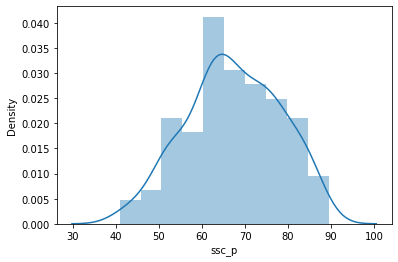

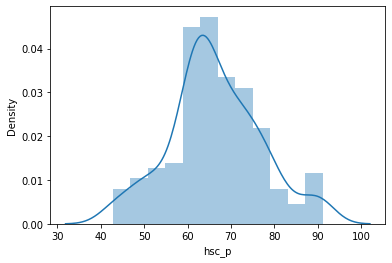

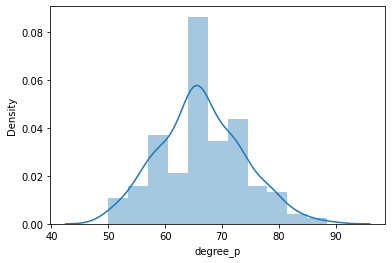

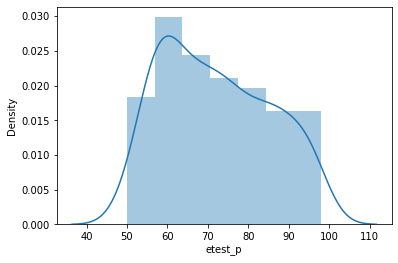

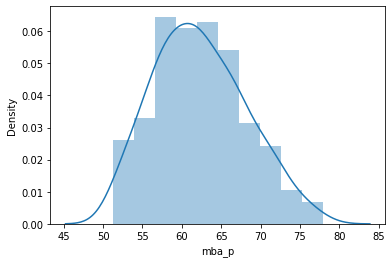

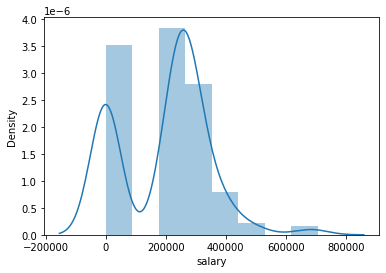

<Figure size 432x288 with 0 Axes>

In [85]:
# Distribution Plots with histogram for all the quantitative columns data variables
for column in Quan:
    sns.distplot(dataset[column])            
    plt.figure()            #it describes Overall distribution of continuous data variables

### 
### Probability Densiy Function

In [86]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns 
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
    # generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' %(sample_mean, sample_std))
    #define the distribution
    dist=norm(sample_mean, sample_std)
    
    #sample probalities for a range of outcomes
    values=[value for value in range(startrange, endrange)]         #One-Liner for loop
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print('The area between range({},{}):{}'.format(startrange,endrange,sum(probabilities)))
    return prob    
    

Mean=62.278, Standard Deviation=5.833
The area between range(30,30):0


0

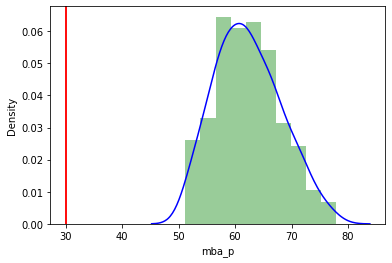

In [87]:
get_pdf_probability(dataset['mba_p'],30,30)

## 
### Cumulative Probability Density Function

(array([0.00930233, 0.00930233, 0.00930233, 0.00930233, 0.01395349,
        0.01395349, 0.01860465, 0.01860465, 0.02325581, 0.02325581,
        0.02790698, 0.02790698, 0.0372093 , 0.0372093 , 0.04186047,
        0.04186047, 0.05116279, 0.05116279, 0.05581395, 0.05581395,
        0.06511628, 0.06511628, 0.11162791, 0.11162791, 0.1255814 ,
        0.1255814 , 0.1255814 , 0.14883721, 0.14883721, 0.15813953,
        0.16744186, 0.17674419, 0.18139535, 0.18139535, 0.18139535,
        0.20930233, 0.20930233, 0.22325581, 0.22790698, 0.24651163,
        0.25116279, 0.27906977, 0.27906977, 0.33488372, 0.33488372,
        0.38139535, 0.39069767, 0.40930233, 0.41395349, 0.44651163,
        0.45116279, 0.46511628, 0.47906977, 0.52093023, 0.5255814 ,
        0.53953488, 0.54418605, 0.57674419, 0.58139535, 0.59534884,
        0.60930233, 0.61860465, 0.62790698, 0.62790698, 0.64186047,
        0.64186047, 0.68837209, 0.68837209, 0.73023256, 0.73023256,
        0.74418605, 0.74883721, 0.7627907 , 0.77

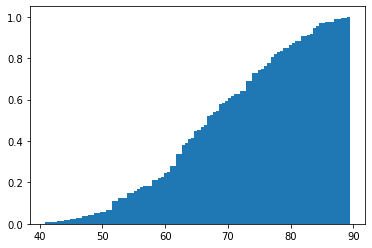

In [88]:
import matplotlib.pyplot as plt
x=dataset['ssc_p']
plt.hist(x,cumulative=True, density=True, bins=100)


In [89]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])

In [90]:
ecdf(89)

0.9953488372093023

### 
### Converting Normal Distribution to Standard Normal Distribution 

<AxesSubplot:xlabel='hsc_p', ylabel='Density'>

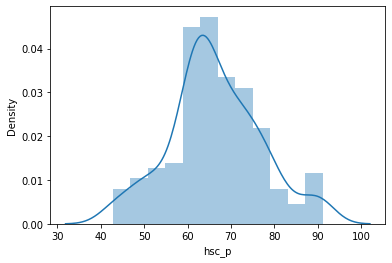

In [91]:
sns.distplot(dataset['hsc_p'])

<AxesSubplot:ylabel='Density'>

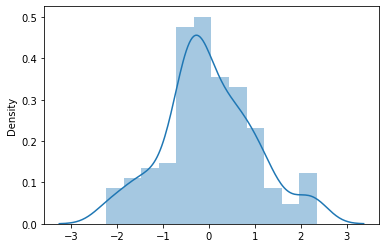

In [92]:
#Normal Distribution to Standard Normal Distribution
mean=dataset['hsc_p'].mean()       
std=dataset['hsc_p'].std()                   
values=[i for i in dataset['hsc_p']]

z_score=[((x-mean)/std) for x in values]

sns.distplot(z_score,kde=True)    

In [93]:
sum(z_score)

-1.8596235662471372e-13

In [94]:
len(z_score)

215

In [95]:
sum(z_score)/len(z_score)       # Mean for Z-Score

-8.649411936033196e-16

#### Converting Normal Distribution to Standard Normal Distribution By User Defined function

In [96]:
# Creating as function from above steps 
def standardNDFBgraph(dataset):
    mean=dataset.mean()             #It automatically calculate Mean for all the quantitative columns only
    std=dataset.std()               #It automatically calculate std for all the quantitative columns only    
    values=[i for i in dataset]

    z_score=[((x-mean)/std) for x in values]

    sns.distplot(z_score,kde=True)
    
    sum(z_score)/len(z_score)

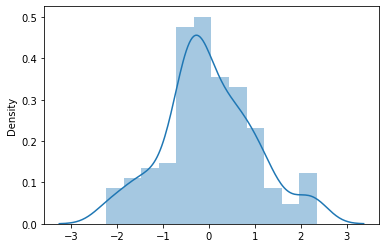

In [97]:
standardNDFBgraph(dataset['hsc_p'])

### 
### 4. Bivariate Analysis

### Covariance

In [98]:
dataset.cov()            # Finding Covariances

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


### 
### Correlation

In [99]:
dataset.corr()          # Finding Correlations

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


### 
### Visualization of the Pairs

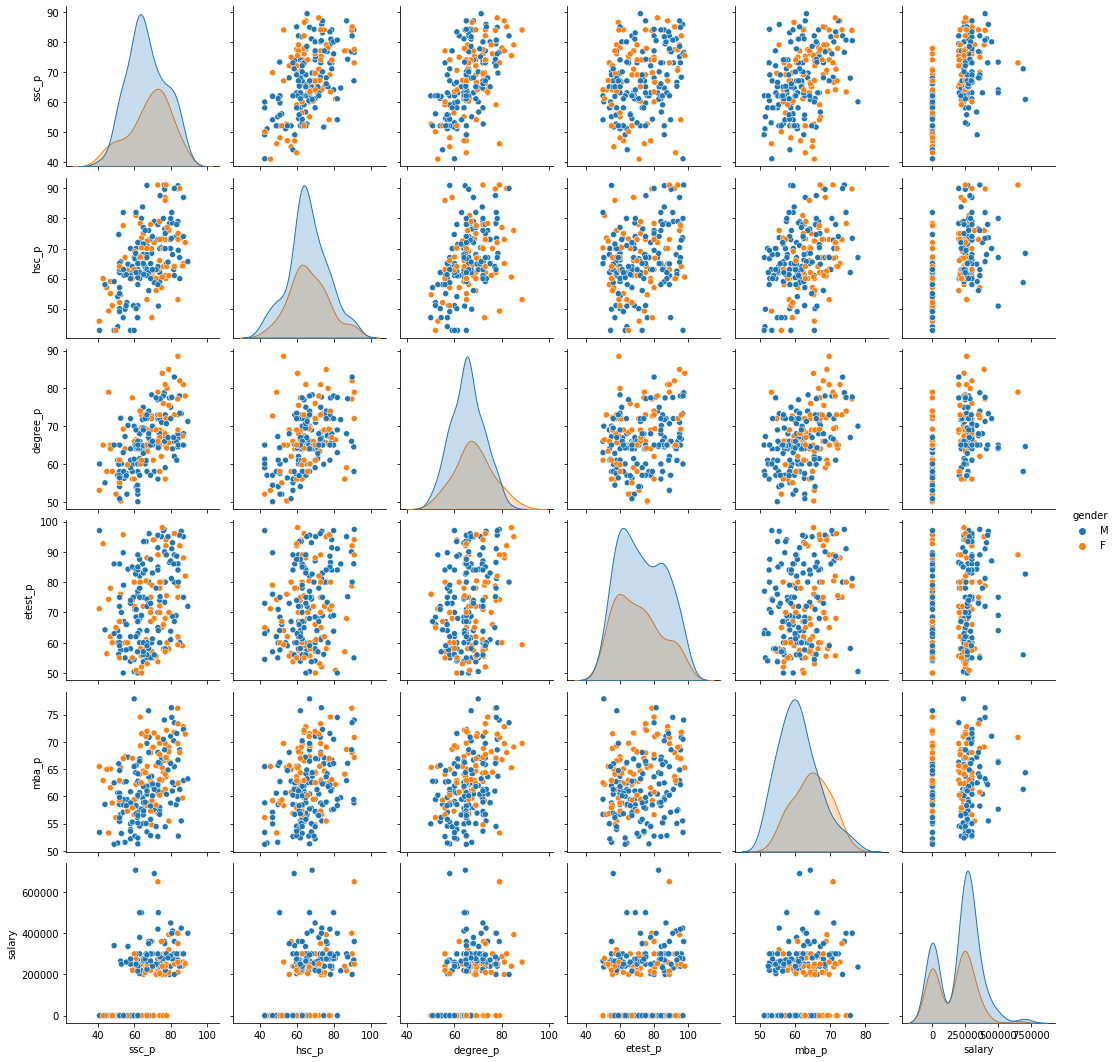

In [100]:
sns.pairplot(dataset,hue='gender')        # By assiging value to hue, can get difference between datas by color
#plt.savefig('Pairplot.png')              #save the graph separately

In [101]:
dataset.corrwith(dataset['mba_p'])   # Find Correlation with each column for a give column 'mba_p'

ssc_p       0.388478
hsc_p       0.348452
degree_p    0.402376
etest_p     0.218055
mba_p       1.000000
salary      0.141417
dtype: float64

### 
### User defined function to separate Quantitative data columns alone 

In [102]:
# User defined function to find Quantitative & Qualitative Columns
def QuanQual(dataset):
    Quan=[]
    Qual=[]
    for column in dataset.columns:
        
        if(dataset[column].dtypes=='object'):
            Qual.append(column)
        else:
            Quan.append(column)
    return Quan      
    return Qual        

In [103]:
quan =QuanQual(dataset)
Quan_data=dataset[quan]   # Load Quanditative datas alone as a separate dataset

In [104]:
Quan_data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0


### 
### Variance Inflaion Factor - (IVF)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    #Calculating VIF
    vif=pd.DataFrame()
    vif['VARIABLES']=x.columns
    vif['VIF']=[ variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)    # or  return vif  

In [106]:
calc_vif(Quan_data)

,VARIABLES,VIF
0,ssc_p,78.168671
1,hsc_p,61.882196
2,degree_p,114.820554
3,etest_p,32.720365
4,mba_p,116.034378
5,salary,4.171783


In [107]:
Quan_data=dataset[['ssc_p','hsc_p']]

In [108]:
calc_vif(Quan_data)

,VARIABLES,VIF
0,ssc_p,41.494645
1,hsc_p,41.494645


In [109]:
Quan_data=dataset[['ssc_p','mba_p']]
calc_vif(Quan_data)

,VARIABLES,VIF
0,ssc_p,44.929108
1,mba_p,44.929108


--

In [110]:
# To know the difference between the usage of with .values method and without .values method
dataset['ssc_p']  # It results values with index, i.e it mentionning the Row index number as like table


0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_p, Length: 215, dtype: float64

In [111]:
# To know the difference between the usage of with .values method and without .values method
dataset['ssc_p'].values   # resuls will be in array or play with values only, without index

array([67.  , 79.33, 65.  , 56.  , 85.8 , 55.  , 46.  , 82.  , 73.  ,
       58.  , 58.  , 69.6 , 47.  , 77.  , 62.  , 65.  , 63.  , 55.  ,
       63.  , 60.  , 62.  , 79.  , 69.8 , 77.4 , 76.5 , 52.58, 71.  ,
       63.  , 76.76, 62.  , 64.  , 67.  , 61.  , 87.  , 62.  , 69.  ,
       51.  , 79.  , 73.  , 81.  , 78.  , 74.  , 49.  , 87.  , 77.  ,
       76.  , 70.89, 63.  , 63.  , 50.  , 75.2 , 54.4 , 40.89, 80.  ,
       74.  , 60.4 , 63.  , 68.  , 74.  , 52.6 , 74.  , 84.2 , 86.5 ,
       61.  , 80.  , 54.  , 83.  , 80.92, 69.7 , 73.  , 82.  , 75.  ,
       84.86, 64.6 , 56.6 , 59.  , 66.5 , 64.  , 84.  , 69.  , 69.  ,
       81.7 , 63.  , 84.  , 70.  , 83.84, 62.  , 59.6 , 66.  , 84.  ,
       85.  , 52.  , 60.23, 52.  , 58.  , 73.  , 76.  , 70.5 , 69.  ,
       54.  , 45.  , 63.  , 77.  , 73.  , 69.  , 59.  , 61.08, 82.  ,
       61.  , 52.  , 69.5 , 51.  , 58.  , 73.96, 65.  , 73.  , 68.2 ,
       77.  , 76.  , 60.8 , 58.  , 64.  , 66.5 , 74.  , 67.  , 84.  ,
       79.  , 72.  ,

## 
## T - Test   (Paired & Unpaired T-Tests)

### Paired T-Test (Independent Sample)
#### Is there a Similarity between Male and Female candidates of Salary?
#### Different Group(i.e., Male, Female) But Same Condition(i.e., Salary)

In [112]:
#Paired T-Test is a statistical test that compares the means of two samples
from scipy.stats import ttest_ind
#dataset=dataset.dropna()                     
male=dataset[dataset['gender']=='M']['salary']
female=dataset[dataset['gender']=='F']['salary']
ttest_ind(male, female)

Ttest_indResult(statistic=2.0937842507001165, pvalue=0.03746230397067219)

#### Hypothesis Test

In [113]:
def hypo_test(pvalue):
    message = []
    if(pvalue <= 0.05):
        print("For the given problem the pvalue is {}".format(pvalue) + " i.e. <= 0.05 \nSo reject the null hypothesis and can take alternate hypothesis. \n\nHence Either there is a Similarity Or Significant difference between given variables.")
        messageBox = "Alternate Hypothesis Accpeted"
    else:
        print("For the given problem the pvalue is {}".format(pvalue) + " i.e. > 0.05 \nso, alternate hypothesis is weak, null can't be rejected. \n\nHence Either there is No Similarity Or No Significant difference between given variables.")
        messageBox = "Null Hypothesis Accpeted"
    message.append(messageBox)
    return message
       

In [114]:
test_ans = ttest_ind(male, female)
pvalue = round(test_ans.pvalue, 2)
pvalue

0.04

In [115]:
hypo_test(pvalue)

For the given problem the pvalue is 0.04 i.e. <= 0.05 
So reject the null hypothesis and can take alternate hypothesis. 

Hence Either there is a Similarity Or Significant difference between given variables.


['Alternate Hypothesis Accpeted']

#### (For the above problem the pvalue is <=0.05 so reject the null hypothesis and can take alternate hypothesis. Hence There is a similarity between male and female candidates of Salary.)

### 
### Unpaired T-Test (Dependent Sample)
#### Is there Similarity between Male candidates of ssc_p, hsc_p marks?
#### Same Group(i.e., Male) But Different  Condition(i.e., ssc_p, hsc_p)

In [116]:
#T-Test is a statistical test that compares the means of two samples
from scipy.stats import ttest_rel
#dataset=dataset.dropna()                      
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male,male1)

Ttest_relResult(statistic=0.6842940392688153, pvalue=0.4949370716000775)

####  Hypothesis Test

In [117]:
test_ans = ttest_rel(male,male1)
pvalue1 = round(test_ans.pvalue, 2)
pvalue1

0.49

In [118]:
hypo_test(pvalue1)

For the given problem the pvalue is 0.49 i.e. > 0.05 
so, alternate hypothesis is weak, null can't be rejected. 

Hence Either there is No Similarity Or No Significant difference between given variables.


['Null Hypothesis Accpeted']

#### (For the above problem the pvalue is >0.05 so, alternate hypothesis is weak, null can't be rejected. Hence There is no similarity between male candidates of ssc_p, hsc_p marks.)

### 
### ANAVO : Analysis of Variance
#### One-Way Classification (ANAVO)

In [119]:
import scipy.stats as stats
stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=0.695991304348204, pvalue=0.49895574725815317)

####  Hypothesis Test

In [120]:
test_ans = stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])
pvalue2 = round(test_ans.pvalue, 2)
pvalue2

0.5

In [121]:
hypo_test(pvalue2)

For the given problem the pvalue is 0.5 i.e. > 0.05 
so, alternate hypothesis is weak, null can't be rejected. 

Hence Either there is No Similarity Or No Significant difference between given variables.


['Null Hypothesis Accpeted']

#### (For the above problem the pvalue is >0.05 so, alternate hypothesis is weak, null can't be rejected. Hence There is no significant difference between ssc_p, hsc_p and degree_p marks.)

#### 
#### Two-Way Classification  (ANAVO)

In [122]:
quan =QuanQual(dataset)
Quan_data=dataset[quan]
Quan_data.shape

(215, 6)

In [123]:
Quan_data.head(6)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
5,55.00,49.80,67.25,55.0,51.58,0.0


In [124]:
Quan_data.iloc[0].values

array([6.70e+01, 9.10e+01, 5.80e+01, 5.50e+01, 5.88e+01, 2.70e+05])

In [125]:
rowValues_1 = Quan_data.iloc[0].values
rowValues_2 = Quan_data.iloc[1].values
rowValues_3 = Quan_data.iloc[2].values
rowValues_4 = Quan_data.iloc[3].values
rowValues_5 = Quan_data.iloc[4].values
rowValues_6 = Quan_data.iloc[5].values

In [126]:
listA = []
listB = []
listC = []
listD = []
listE = []
listF = []

for columnName_1 in rowValues_1:
    listA.append(columnName_1)
for columnName_2 in rowValues_2:
    listB.append(columnName_2)
for columnName_3 in rowValues_3:
    listC.append(columnName_3)
for columnName_4 in rowValues_4:
    listD.append(columnName_4)
for columnName_5 in rowValues_5:
    listE.append(columnName_5)    
for columnName_6 in rowValues_6:    
    listF.append(columnName_6)

In [127]:
listB

[79.33, 78.33, 77.48, 86.5, 66.28, 200000.0]

In [128]:
Quan_data = pd.DataFrame({"student_1" : listA, "student_2" : listB, "student_3": listC, "student_4" : listD, "student_5" : listE, "student_6" : listF})

In [129]:
Quan_data

,student_1,student_2,student_3,student_4,student_5,student_6
0,67.0,79.33,65.0,56.00,85.8,55.00
1,91.0,78.33,68.0,52.00,73.6,49.80
2,58.0,77.48,64.0,52.00,73.3,67.25
3,55.0,86.50,75.0,66.00,96.8,55.00
4,58.8,66.28,57.8,59.43,55.5,51.58
5,270000.0,200000.00,250000.0,0.00,425000.0,0.00


In [130]:
import scipy.stats as stats
stats.f_oneway(Quan_data["student_1"], Quan_data["student_2"], Quan_data["student_3"])

F_onewayResult(statistic=0.022207760671763402, pvalue=0.9780691103580185)

#### Hypothesis test

In [131]:
#Test for Student 1,  Student 2 and Student 3
test_ans = stats.f_oneway(Quan_data["student_1"], Quan_data["student_2"], Quan_data["student_3"])
pvalue3 = round(test_ans.pvalue, 2)
pvalue3

0.98

In [132]:
hypo_test(pvalue3)

For the given problem the pvalue is 0.98 i.e. > 0.05 
so, alternate hypothesis is weak, null can't be rejected. 

Hence Either there is No Similarity Or No Significant difference between given variables.


['Null Hypothesis Accpeted']

#### (For the above problem the pvalue is >0.05 so, alternate hypothesis is weak, null can't be rejected. Hence There is no significant difference between Student 1,  Student 2, and Student 3.)
#### 

## ~~ Inferential Analysis (Conclusions)

###  ~Placed and Not Placed Candidates Count.

In [133]:
dataset["status"].value_counts()             #By value counts to status we found that 148 are Placed & 67 aren't placed.

Placed        148
Not Placed     67
Name: status, dtype: int64

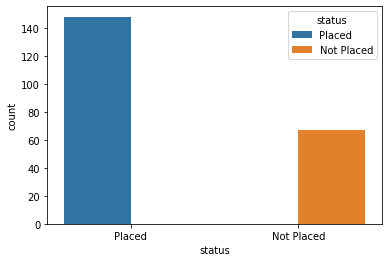

In [134]:
#Countplot of status/status
sns.countplot(x ="status",hue="status",data = dataset)
plt.show()                                        

#### 
### ~Reasons behind Non Placement of Candidates

In [135]:
Not_Placed=dataset.groupby(["status","workex","degree_t","specialisation"])
#Not_Placed.count()
Not_Placed.size()

status      workex  degree_t   specialisation
Not Placed  No      Comm&Mgmt  Mkt&Fin           17
                               Mkt&HR            20
                    Others     Mkt&Fin            1
                               Mkt&HR             4
                    Sci&Tech   Mkt&Fin            3
                               Mkt&HR            12
            Yes     Comm&Mgmt  Mkt&Fin            1
                               Mkt&HR             5
                    Others     Mkt&Fin            1
                    Sci&Tech   Mkt&Fin            2
                               Mkt&HR             1
Placed      No      Comm&Mgmt  Mkt&Fin           37
                               Mkt&HR            26
                    Others     Mkt&Fin            1
                               Mkt&HR             1
                    Sci&Tech   Mkt&Fin           10
                               Mkt&HR             9
            Yes     Comm&Mgmt  Mkt&Fin           31
                  

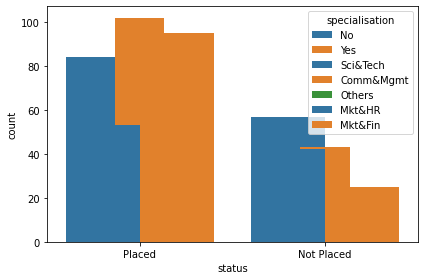

In [136]:
#Countplot of status/workex, status/degree_t and status/specialisation 
sns.countplot(x ="status",hue="workex",data = dataset)
sns.countplot(x ="status",hue="degree_t",data = dataset) 
sns.countplot(x ="status",hue="specialisation",data = dataset)
plt.tight_layout()
plt.show()  

##### From the Status Totally 67 Candidates were not placed.
##### In the Total 67 Mostly due to no experience, 57 Candidates were not placed.
##### And also 15 more Sci&Tech degree_t candidates is not fit for Mkt&HR and Mkt&Fin specialisations 
##### and few of the 4 more Others degree_t candidates is also not fit for Mkt&HR specialisations
#####  

#### 
### ~Relationship between salary and mba_p

In [137]:
dataset[["salary","mba_p"]].corr()

,salary,mba_p
salary,1.000000,0.141417
mba_p,0.141417,1.000000


In [138]:
dataset["mba_p"].corr(dataset["salary"])  #Salary and mba_p is weakly correlated with each other

0.14141713944325937

<function matplotlib.pyplot.show(close=None, block=None)>

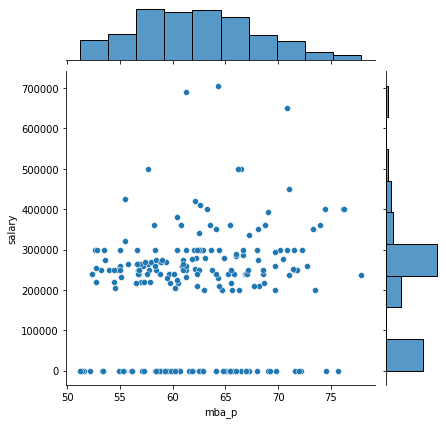

In [139]:
sns.jointplot(x="mba_p",y="salary",data=dataset)   #Salary ranges between 2-4 lakhs for 55 to 70 marks range in mba_p mark
plt.show

#### 
### ~Minimum Salary is drawn by which Specialisation

In [140]:
pd.pivot_table(dataset,values="salary",index=["specialisation"]) # Comparition made by Pivot table method.
                                                                    #First Mkt&HR, Minimum Salary is 1.50 lakhs.
                                                                    #Second Mkt&Fin, Minimum Salary is 2.36 lakhs.

,salary
specialisation,
Mkt&Fin,234643.750000
Mkt&HR,150842.105263


(-0.5, 1.5, 0.0, 1000000.0)

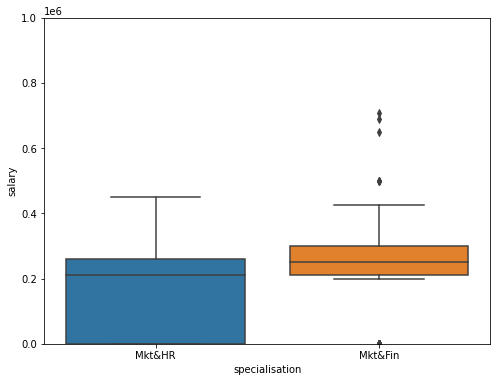

In [141]:
#boxplot of specialisation/salary
var = 'specialisation'
data = pd.concat([dataset['salary'],dataset[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='salary',data=data)
fig.axis(ymin=0,ymax=1000000)

#### 
### ~Howmany of them drawn Salary above 5 lakhs

In [142]:
dataset[dataset["salary"]>=500000]
len(dataset[dataset["salary"]>=500000])   # Six Candidates drawn above 5 lakhs salary

6

<AxesSubplot:ylabel='None'>

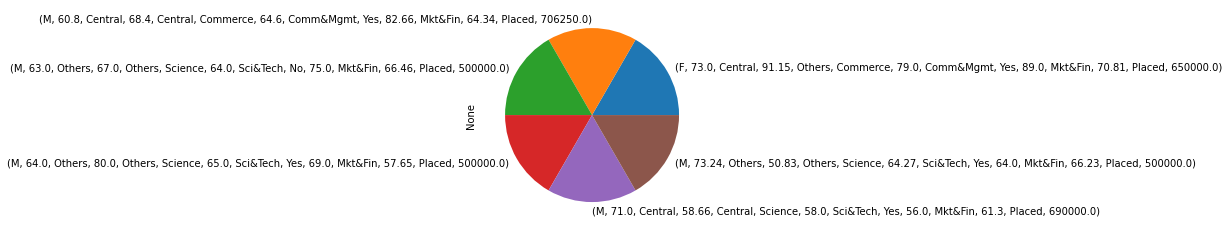

In [143]:
dataset[dataset["salary"]>=500000].value_counts().plot.pie(autopct=None)

#### 
### ~ANAVO(Analysis of Variance) between etest_p and mba_p at signifance level 5%.

In [144]:
#Analysis of Variance By One-Way Classification
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

####  Hypothesis Test

In [145]:
test_ans = stats.f_oneway(dataset['etest_p'],dataset['mba_p'])
pvalue4 = round(test_ans.pvalue, 2)
pvalue4

0.0

In [146]:
hypo_test(pvalue4)

For the given problem the pvalue is 0.0 i.e. <= 0.05 
So reject the null hypothesis and can take alternate hypothesis. 

Hence Either there is a Similarity Or Significant difference between given variables.


['Alternate Hypothesis Accpeted']

##### (For the above problem the pvalue is <=0.05 so reject the null hypothesis and can take alternate hypothesis. Hence There is a significant difference between etest_p and mba_p marks.)
#### 

#### 
#### Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) w.r.t salary  at significance level of 5%. (Take the decision using Hypothesis Testing)

In [147]:
#Paired T-Test(Independent Sample)
from scipy.stats import ttest_ind
deg = dataset[dataset['degree_t']=='Sci&Tech']['salary']
spc = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(deg,spc)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

In [148]:
test_ans = ttest_ind(deg,spc)
pvalue5 = round(test_ans.pvalue, 2)
pvalue5

0.01

In [149]:
hypo_test(pvalue5)              # There is a similarity

For the given problem the pvalue is 0.01 i.e. <= 0.05 
So reject the null hypothesis and can take alternate hypothesis. 

Hence Either there is a Similarity Or Significant difference between given variables.


['Alternate Hypothesis Accpeted']

##### (For the above problem the pvalue is <=0.05 so reject the null hypothesis and can take alternate hypothesis. Hence There is a similarity between degree_t(Sci&Tech) and specialisation(Mkt&HR))

#### 
### ~Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%. (Take the decision using Hypothesis Testing)

In [150]:
#Unpaired T-Test(Dependent sample)
from scipy.stats import ttest_rel
deg = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
deg1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(deg, deg1)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [151]:
test_ans = ttest_rel(deg, deg1)
pvalue6 = round(test_ans.pvalue, 2)
pvalue6

0.0

In [152]:
hypo_test(pvalue6) 

For the given problem the pvalue is 0.0 i.e. <= 0.05 
So reject the null hypothesis and can take alternate hypothesis. 

Hence Either there is a Similarity Or Significant difference between given variables.


['Alternate Hypothesis Accpeted']

#### 
### ~PDF for the salary range from 700000 - 900000

In [153]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=197615.116, Standard Deviation=150305.844
The area between range(700000,900000):0.0004137812663830048


0.0004137812663830048

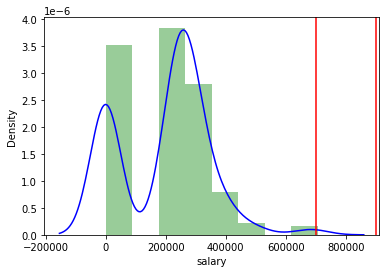

In [154]:
get_pdf_probability(dataset['salary'],700000,900000)

### 
### ~Highly Correlated Columns with Salary

##### High degree:- If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a high correlation.
##### Moderate degree:- If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
##### Low degree:- When the value lies below + .29, then it is said to be a low correlation.
##### No correlation:- When the value is zero.

In [155]:
correlationTable=pd.DataFrame(index=["ssc_p","hsc_p","degree_p","mba_p","etest_p"],columns=["salary"])  #Creating a Table
for i in correlationTable.index:
    correlationTable["salary"][i]=dataset[i].corr(dataset["salary"])

In [156]:
correlationTable

,salary
ssc_p,0.558475
hsc_p,0.459424
degree_p,0.423762
mba_p,0.141417
etest_p,0.186775


In [157]:
correlationTable.sort_values('salary',ascending=False)  # Highly correlated columns with salary listed in ascending order.
                                                         # In the row ssc_p is highly correlated with salary (0.538090).

,salary
ssc_p,0.558475
hsc_p,0.459424
degree_p,0.423762
etest_p,0.186775
mba_p,0.141417
